In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.spatial.distance import cdist
from scipy.optimize import fsolve
import anndata as ad
import scanpy as sc
from PIL import Image
import tifffile as tifi
import squidpy as sq
import networkx as nx
import os
import json
import cv2
import numpy as np
from matplotlib.lines import Line2D
import seaborn as sns

In [4]:
# Anndata object path
cells_adata_path_A1 = (
    "../Data/skin_TXK6Z4X_A1_processed/tmap/weighted_by_area_celltypist_cells_adata.h5"
)

cells_adata_path_D1 = (
    "../Data/skin_TXK6Z4X_D1_processed/tmap/weighted_by_area_celltypist_cells_adata.h5"
)

# Cropped whole slide image
wsi_path = "../Data/skin_TXK6Z4X_A1_processed/tmap/wsi.tif"

# Cell boundaries image
cells_layer_path = "../Data/skin_TXK6Z4X_A1_processed/cells_layer.png"

In [5]:
adata_A1 = sc.read_h5ad(cells_adata_path_A1)
adata_D1 = sc.read_h5ad(cells_adata_path_D1)

In [6]:
umi_counts_A1 = adata_A1.to_df()
umi_counts_A1

,PERM1,CCDC27,TNFRSF9,ANGPTL7,C1orf158,PRAMEF11,PRAMEF10,PRAMEF6,PRAMEF18,PDPN,...,MAGEC1,SPANXN3,MAGEA11,MAGEA10,MAGEA6,PNMA6E,BGN,TKTL1,RAB39B,NLGN4Y
id,,,,,,,,,,,,,,,,,,,,,
ID_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ID_10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ID_100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ID_1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ID_1001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_81072,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ID_81078,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ID_81096,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [8]:
cell_list = [
    "ID_61915",
    "ID_62110",
    "ID_62246",
    "ID_62328",
    "ID_62370",
    "ID_62932",
    "ID_62970",
    "ID_63004",
    "ID_63061",
    "ID_63084",
    "ID_63123",
    "ID_63131",
    "ID_63358",
    "ID_63389",
    "ID_63493",
    "ID_63500",
    "ID_63505",
    "ID_63553",
    "ID_63592",
    "ID_63617",
    "ID_63623",
    "ID_63703",
    "ID_63747",
    "ID_63801",
    "ID_63961",
    "ID_64028",
    "ID_64066",
    "ID_64123",
    "ID_64208",
    "ID_64234",
    "ID_64236",
    "ID_64356",
    "ID_64403",
    "ID_64602",
    "ID_64755",
    "ID_64771",
    "ID_64784",
    "ID_64806",
    "ID_64826",
    "ID_64866",
    "ID_64974",
    "ID_65090",
    "ID_65261",
    "ID_65308",
    "ID_65324",
    "ID_65334",
    "ID_65413",
    "ID_65443",
    "ID_65463",
    "ID_65477",
    "ID_65530",
    "ID_65608",
    "ID_65661",
    "ID_65753",
    "ID_65812",
    "ID_65909",
    "ID_65967",
    "ID_65994",
    "ID_66061",
    "ID_66097",
    "ID_66183",
    "ID_66202",
    "ID_66224",
    "ID_66238",
    "ID_66241",
    "ID_66259",
    "ID_66511",
    "ID_66528",
    "ID_66732",
    "ID_66739",
    "ID_66838",
    "ID_66925",
    "ID_66935",
    "ID_66955",
    "ID_67012",
    "ID_67089",
    "ID_67094",
    "ID_67140",
    "ID_67252",
    "ID_67260",
    "ID_67320",
    "ID_67331",
    "ID_67385",
    "ID_67464",
    "ID_67533",
    "ID_67537",
    "ID_67551",
    "ID_67640",
    "ID_67644",
    "ID_67658",
    "ID_67675",
    "ID_67729",
    "ID_67796",
    "ID_67822",
    "ID_67879",
    "ID_67893",
    "ID_67959",
    "ID_67971",
    "ID_68066",
    "ID_68074",
    "ID_68268",
    "ID_68284",
    "ID_68320",
    "ID_68380",
    "ID_68491",
    "ID_68493",
    "ID_68579",
    "ID_68581",
    "ID_68587",
    "ID_68649",
    "ID_68688",
    "ID_68714",
    "ID_68741",
    "ID_68833",
    "ID_68940",
    "ID_68954",
    "ID_69109",
    "ID_69110",
    "ID_69160",
    "ID_69219",
    "ID_69238",
    "ID_69402",
    "ID_69408",
    "ID_69477",
    "ID_69664",
    "ID_69744",
    "ID_69746",
    "ID_69824",
    "ID_69886",
    "ID_69932",
    "ID_70009",
    "ID_70021",
    "ID_70126",
    "ID_70143",
    "ID_70207",
    "ID_70243",
    "ID_70321",
    "ID_70375",
    "ID_70376",
    "ID_70405",
    "ID_70448",
    "ID_70534",
    "ID_71563",
    "ID_71652",
    "ID_71708",
    "ID_71719",
    "ID_71834",
    "ID_71902",
    "ID_71929",
    "ID_72008",
    "ID_72296",
    "ID_72392",
    "ID_72412",
    "ID_72422",
    "ID_72451",
    "ID_72546",
    "ID_72793",
    "ID_73078",
    "ID_73086",
    "ID_73517",
    "ID_73561",
    "ID_73773",
    "ID_73803",
    "ID_73838",
    "ID_73907",
    "ID_73928",
    "ID_73943",
    "ID_74007",
    "ID_74066",
    "ID_74117",
    "ID_74118",
    "ID_74179",
    "ID_74262",
    "ID_74488",
    "ID_74505",
    "ID_74666",
    "ID_74835",
    "ID_74930",
    "ID_74944",
    "ID_75032",
    "ID_75211",
    "ID_75283",
    "ID_75346",
    "ID_75452",
    "ID_75574",
    "ID_75604",
    "ID_75692",
    "ID_75764",
    "ID_75798",
    "ID_75904",
    "ID_75965",
    "ID_75990",
    "ID_76031",
    "ID_76249",
    "ID_76317",
    "ID_76319",
    "ID_76350",
    "ID_76382",
    "ID_76473",
    "ID_76588",
    "ID_76603",
    "ID_76685",
    "ID_76776",
    "ID_76819",
    "ID_76925",
    "ID_76939",
    "ID_76957",
    "ID_77008",
    "ID_77010",
    "ID_77029",
    "ID_77049",
    "ID_77082",
    "ID_77192",
    "ID_77232",
    "ID_77251",
    "ID_77257",
    "ID_77466",
    "ID_77496",
    "ID_77569",
    "ID_77628",
    "ID_77833",
    "ID_78166",
    "ID_78421",
    "ID_78423",
    "ID_78693",
    "ID_78766",
    "ID_78779",
    "ID_78845",
    "ID_78893",
    "ID_78932",
    "ID_79072",
    "ID_79136",
    "ID_79260",
    "ID_79352",
    "ID_79597",
    "ID_79604",
    "ID_79644",
    "ID_79693",
    "ID_79700",
    "ID_79963",
    "ID_79992",
    "ID_80008",
    "ID_80026",
    "ID_80100",
    "ID_80112",
    "ID_80437",
    "ID_80575",
    "ID_80691",
    "ID_80802",
    "ID_81099",
    "ID_81124",
    "ID_81133",
    "ID_62667",
    "ID_63036",
    "ID_63048",
    "ID_64693",
    "ID_64992",
    "ID_65053",
    "ID_65431",
    "ID_65681",
    "ID_65926",
    "ID_65987",
    "ID_66242",
    "ID_66276",
    "ID_66307",
    "ID_66316",
    "ID_66634",
    "ID_66699",
    "ID_66728",
    "ID_66896",
    "ID_67330",
    "ID_67437",
    "ID_67715",
    "ID_67746",
    "ID_67958",
    "ID_68053",
    "ID_68194",
    "ID_68198",
    "ID_68327",
    "ID_68625",
    "ID_68750",
    "ID_69300",
    "ID_69310",
    "ID_69325",
    "ID_69455",
    "ID_69488",
    "ID_69927",
    "ID_69937",
    "ID_70063",
    "ID_70089",
    "ID_70152",
    "ID_70265",
    "ID_70421",
    "ID_72086",
    "ID_72283",
    "ID_72850",
    "ID_73242",
    "ID_73510",
    "ID_74061",
    "ID_74194",
    "ID_74348",
    "ID_74557",
    "ID_74811",
    "ID_75149",
    "ID_75408",
    "ID_75573",
    "ID_75635",
    "ID_75772",
    "ID_75813",
    "ID_76053",
    "ID_76183",
    "ID_76299",
    "ID_76504",
    "ID_76509",
    "ID_76872",
    "ID_77027",
    "ID_77570",
    "ID_77757",
    "ID_77777",
    "ID_77804",
    "ID_77888",
    "ID_78222",
    "ID_78308",
    "ID_78497",
    "ID_78789",
    "ID_78921",
    "ID_78982",
    "ID_79321",
    "ID_79479",
    "ID_79521",
    "ID_79562",
    "ID_79842",
    "ID_80147",
    "ID_80413",
    "ID_80511",
    "ID_80582",
    "ID_80626",
    "ID_80781",
    "ID_81058",
]

In [ ]:
filtered_df = umi_counts_A1[umi_counts_A1.index.isin(cell_list)]
filtered_df = filtered_df.astype(float)

# ------ getting the gene information(test: one of the input of the Spacia) ------
# filtered_df.to_csv("skin_TXK6Z4X_A1_counts_test.txt", sep="\t")
filtered_df

,PERM1,CCDC27,TNFRSF9,ANGPTL7,C1orf158,PRAMEF11,PRAMEF10,PRAMEF6,PRAMEF18,PDPN,...,MAGEC1,SPANXN3,MAGEA11,MAGEA10,MAGEA6,PNMA6E,BGN,TKTL1,RAB39B,NLGN4Y
id,,,,,,,,,,,,,,,,,,,,,
ID_61915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ID_62110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ID_62246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ID_62328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ID_62370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_80511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ID_80582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ID_80626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
filtered_adata = adata_A1[adata_A1.obs.index.isin(cell_list)]
filtered_spatial = pd.DataFrame(
    filtered_adata.obsm["spatial"],
    columns=["cell_x", "cell_y"],
    index=filtered_adata.obs.index,
)
filtered_spatial["cell_type"] = filtered_adata.obs["cell_type"]
filtered_spatial.rename(columns={"cell_x": "X", "cell_y": "Y"}, inplace=True)

# ------ getting the cell boundaries(test: one of the input of the Spacia) ------
# filtered_spatial.to_csv("skin_TXK6Z4X_A1_spatial_test.txt", sep="\t")
filtered_spatial

,X,Y,cell_type
id,,,
ID_61915,6571,8099,stromal 1
ID_62110,6553,8014,cms2
ID_62246,6538,8132,stromal 1
ID_62328,6503,8145,cms2
ID_62370,6458,8221,stromal 1
...,...,...,...
ID_80511,6940,7881,myofibroblasts
ID_80582,7107,7885,cms2
ID_80626,6989,7909,cms2


In [11]:
script_path = "../Spacia/spacia.py"
output_path = "cell2cellinteractionOutput"
counts_fn = "skin_TXK6Z4X_A1_counts_test.txt"
meta_fn = "skin_TXK6Z4X_A1_spatial_test.txt"

params = '-rc cms2 -sc myofibroblasts -rf "COL1A1|COL3A1" -sf COL3A1 -d 30 -nc 20'
cmd = "python {} {} {} {} -o {}".format(
    script_path, counts_fn, meta_fn, params, output_path
)
print(cmd)
codes = os.system(cmd)

python ../Spacia/spacia.py skin_TXK6Z4X_A1_counts_test.txt skin_TXK6Z4X_A1_spatial_test.txt -rc cms2 -sc myofibroblasts -rf "COL1A1|COL3A1" -sf COL3A1 -d 30 -nc 20 -o cell2cellinteractionOutput


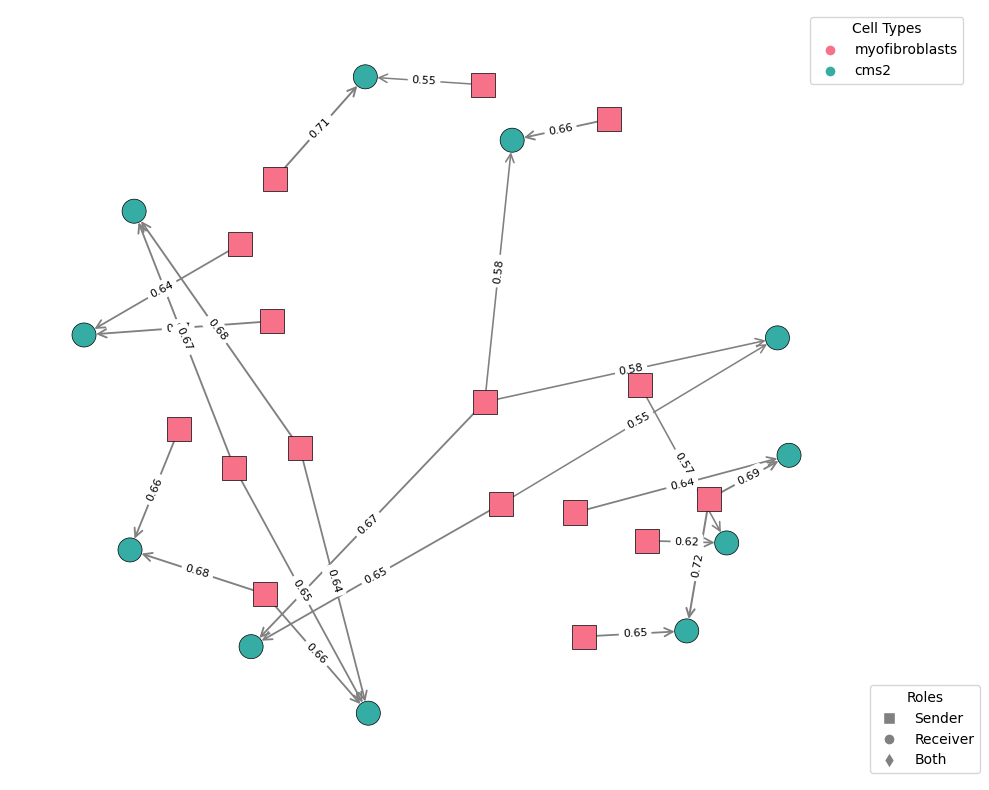

In [14]:
file_path = "cell2cellinteractionOutput/Interactions.csv"
df = pd.read_csv(file_path)
G = nx.DiGraph()
for _, row in df.iterrows():
    G.add_edge(row["Sender"], row["Receiver"], weight=round(row["Primary_instance_score"], 2))

node_ids = list(G.nodes())
cell_types = adata_A1.obs.loc[node_ids, "cell_type"]

unique_cell_types = cell_types.unique()
palette = sns.color_palette("husl", len(unique_cell_types))
color_map = {ct: color for ct, color in zip(unique_cell_types, palette)}

senders = df["Sender"].unique()
receivers = df["Receiver"].unique()
sender_nodes = [n for n in G.nodes() if n in senders and n not in receivers]
receiver_nodes = [n for n in G.nodes() if n in receivers and n not in senders]
both_nodes = [n for n in G.nodes() if n in senders and n in receivers]

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=43, k=0.5)

edge_widths = [G[u][v]['weight']*2 for u, v in G.edges()] 
nx.draw_networkx_edges(
    G, pos, 
    width=edge_widths, 
    arrows=True, 
    arrowstyle="->", 
    arrowsize=15,
    edge_color="gray"
)

if sender_nodes:
    nx.draw_networkx_nodes(
        G, pos, nodelist=sender_nodes,
        node_color=[color_map[cell_types.loc[n]] for n in sender_nodes],
        node_shape="s",
        node_size=300,
        edgecolors="black",
        linewidths=0.5
    )

if receiver_nodes:
    nx.draw_networkx_nodes(
        G, pos, nodelist=receiver_nodes,
        node_color=[color_map[cell_types.loc[n]] for n in receiver_nodes],
        node_shape="o",
        node_size=300,
        edgecolors="black",
        linewidths=0.5
    )

if both_nodes:
    nx.draw_networkx_nodes(
        G, pos, nodelist=both_nodes,
        node_color=[color_map[cell_types.loc[n]] for n in both_nodes],
        node_shape="d",
        node_size=300,
        edgecolors="black",
        linewidths=0.5
    )

color_legend = [
    Line2D([0], [0], 
    marker="o", 
    color="w", 
    label=ct, 
    markerfacecolor=color_map[ct], 
    markersize=8
) for ct in unique_cell_types]

shape_legend = [
    Line2D([0], [0], 
    marker="s", 
    color="w", 
    label="Sender", 
    markerfacecolor="gray", 
    markersize=8),
    Line2D([0], [0], 
    marker="o", 
    color="w", 
    label="Receiver", 
    markerfacecolor="gray", 
    markersize=8),
    Line2D([0], [0], 
    marker="d", 
    color="w", 
    label="Both", 
    markerfacecolor="gray", 
    markersize=8)
]

first_legend = plt.legend(
    handles=color_legend, 
    title="Cell Types", 
    loc="upper left", 
    bbox_to_anchor=(0.93, 1)
)
plt.gca().add_artist(first_legend)
plt.legend(
    handles=shape_legend, 
    title="Roles", 
    loc="lower left", 
    bbox_to_anchor=(1, 0)
)

edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(
    G, pos, 
    edge_labels=edge_labels,
    font_size=8,
    label_pos=0.5
)

plt.axis("off")
plt.tight_layout()
plt.show()